### <b>■ MNIST 데이터셋 읽기</b>
```python
    def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """MNIST 데이터셋 읽기
    
    Parameters
    ----------
    normalize : 이미지의 픽셀 값을 0.0~1.0 사이의 값으로 정규화할지 정한다.
    one_hot_label : 
        one_hot_label이 True면、레이블을 원-핫(one-hot) 배열로 돌려준다.
        one-hot 배열은 예를 들어 [0,0,1,0,0,0,0,0,0,0]처럼 한 원소만 1인 배열이다.
    flatten : 입력 이미지를 1차원 배열로 만들지를 정한다. 
    
    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 
```

### ※ 문제33. mnist 데이터의 훈련 데이터 6만장 중 첫번째 이미지가 어떤 숫자인지 출력하시오

In [4]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### ※ 문제34. 위의 훈련 데이터의 첫번째 숫자를 시각화 하시오

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]

print(img.shape)  # (1, 28, 28)

img = img.reshape(28,28)
print(img.shape)  # (28, 28)

img_show(img)

(1, 28, 28)
(28, 28)


### ※ 문제35. 훈련 데이터의 첫번째 이미지인 숫자 5를 one hot encoding 했을 때 어떻게 출력되는지 확인하시오

In [9]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=True)

img = x_train[0]
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


    one hot encoding을 하는 이유 
        오차함수에서 오차를 구하기 쉽게 하기 위해서
        
### <b>■ mnist 흑백 이미지와 RGB 컬러 이미지의 shape 차이</b>
    1. mnist의 shape 확인
    2. 아이린 사진의 shape 확인

In [11]:
# 1.
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)
print(x_train.shape)
# ( 60000  ,  1   ,  28  ,  28  )
#  전체개수  색조    가로   세로

(60000, 1, 28, 28)


(500, 500, 3)


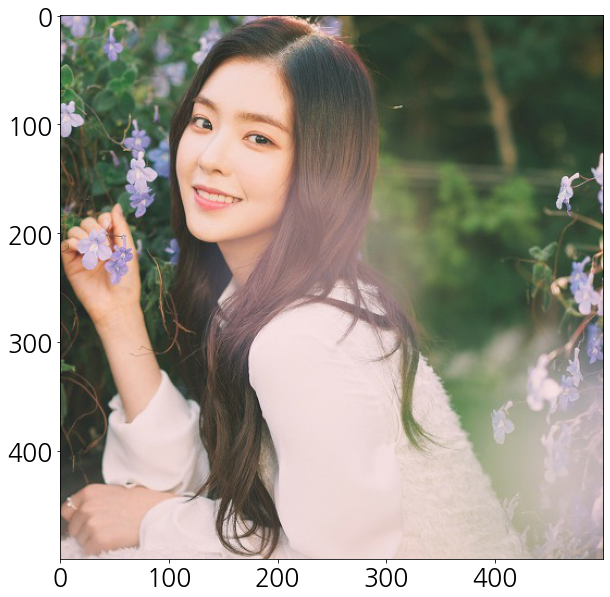

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':25})

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
plt.imshow(img_pixel)
print(img_pixel.shape)
# (500, 500, 3)
#  가로 세로 색조

### ※ 문제36. 아이린 사진에서 red 부분의 행렬만 취하고 red 부분만 이미지로 시각화 하시오

[[ 79 113 147 ...  50  50  50]
 [101 137 169 ...  51  51  50]
 [116 152 181 ...  49  49  49]
 ...
 [219 219 222 ... 163 173 184]
 [222 222 224 ... 163 174 184]
 [222 223 225 ... 165 176 184]]


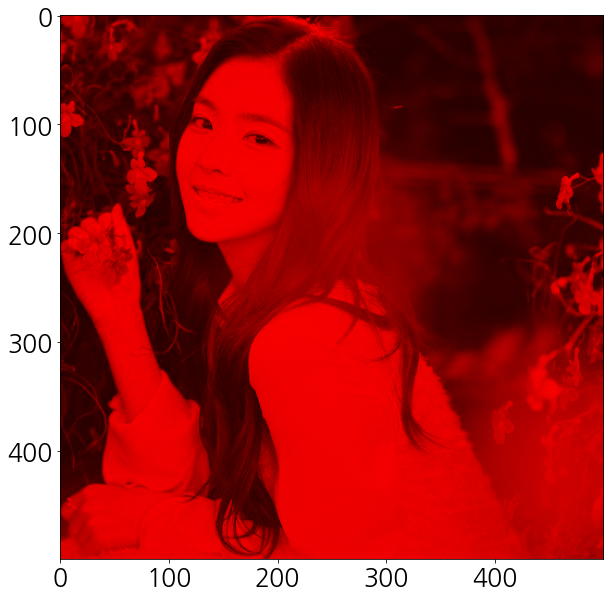

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':25})


img = Image.open('아이린.jpg')
img_pixel = np.array(img)
print(img_pixel[:,:,0])
img_pixel[:,:,1] = 0
img_pixel[:,:,2] = 0
plt.imshow(img_pixel)

### ※ 문제37. 아이린의 green 부분만 시각화 하시오

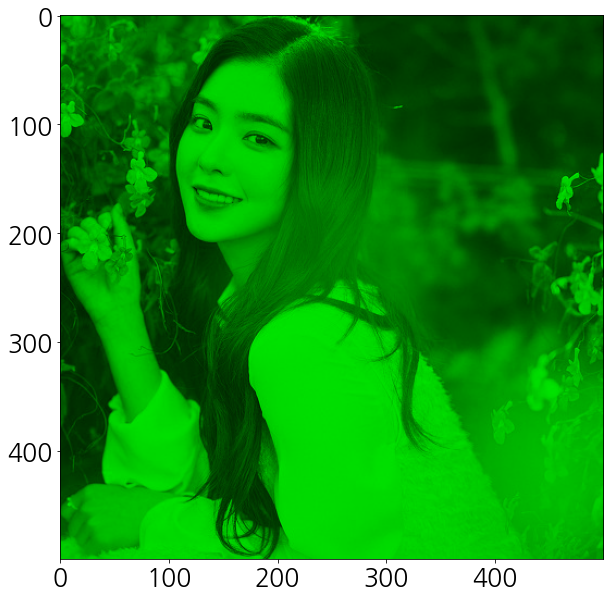

In [27]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':25})

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
img_pixel[:,:,0] = 0
img_pixel[:,:,2] = 0
plt.imshow(img_pixel)

### ※ 문제38. 아이린의 blue 부분만 시각화 하시오

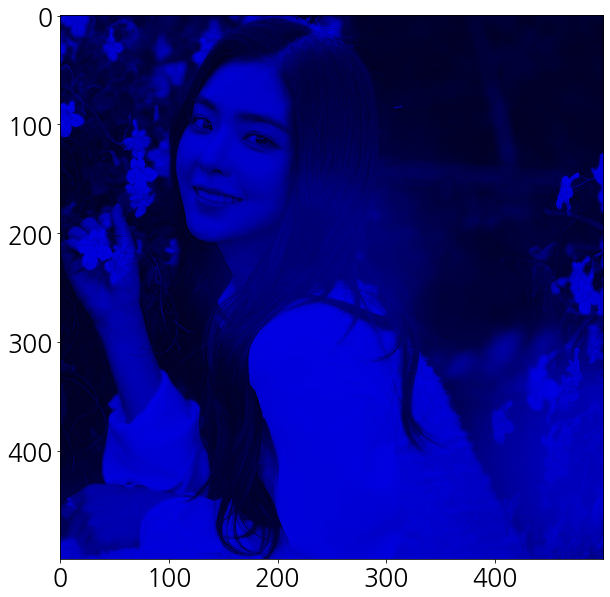

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':25})

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
img_pixel[:,:,0] = 0
img_pixel[:,:,1] = 0
plt.imshow(img_pixel)

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mgimg
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size':25})

img = Image.open('아이린.jpg')
img_pixel = np.array(img)
img_pixel.shape

(500, 500, 3)

### <b>■ 저자가 만들어온 가중치와 바이어스가 들어있는 pickle 파일을 파이썬으로 로드하시오</b>

In [ ]:
import pickle

def init_network():
    with open("D:/dl/sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

network = init_network()

print(network["W1"].shape)
print(network["W2"].shape)
print(network["W3"].shape)
print(network["b1"].shape)
print(network["b2"].shape)
print(network["b3"].shape)

### ※ 문제39. 위의 network의 자료구조는 딕셔너리이다. network 딕셔너리의 key는 무엇이 있는지 확인하시오

In [43]:
import pickle

def init_network():
    with open("D:/dl/sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

network = init_network()
print(network.keys())
for i, key in enumerate(network):
    print(key)

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
b2
W1
b1
W2
W3
b3


### <b>■ 저자가 만들어온 pickle 파일로 3층 신경망 구현하기 (p.100)</b>
    1. get_data() : mnist 데이터를 로드해서 훈련 데이터와 테스트 데이터 가져오는 함수
    2. init_network() : 저자가 만들어온 pickle 파일 불러오는 함수
    3. predict() : 3층 신경망을 쌓아서 필기체 데이터를 예측하는 신경망 함수

In [45]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() # 테스트 데이터 10_000장을 라벨과 같이 불러옴
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
# y = predict(network,x[0]) # 테스트 데이터의 첫번째 이미지를 예측
print(t[0]) # 7
print(y) # 예측값이 소프트맥스 함수 통과한 결과인 확률 벡터로 출력
print("Accuracy:"+str(float(accuracy_cnt)/len(x))) # 0.9352

7
[4.2882870e-04 2.0043037e-06 2.5405686e-03 2.0168939e-06 5.5917754e-04
 3.1262074e-04 9.9614763e-01 4.3499412e-07 6.3756934e-06 3.7751448e-07]
Accuracy:0.9352


### ※ 문제40. 위의 결과의 확률벡터를 다 더하면 1인지 확인하시오

In [47]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() # 테스트 데이터 10_000장을 라벨과 같이 불러옴
network = init_network()

accuracy_cnt = 0
# for i in range(len(x)):
#     y = predict(network, x[i])
#     p = np.argmax(y)
#     if p == t[i]:
#         accuracy_cnt += 1
y = predict(network,x[0]) # 테스트 데이터의 첫번째 이미지를 예측
print(t[0]) # 7
print(y) # 예측값이 소프트맥스 함수 통과한 결과인 확률 벡터로 출력
# print("Accuracy:"+str(float(accuracy_cnt)/len(x))) # 0.9352
print(sum(y))

7
[8.4412568e-05 2.6350631e-06 7.1549421e-04 1.2586262e-03 1.1727954e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744702e-06 8.1831118e-04]
1.0000000412837196


### ※ 문제41. 아래의 확률 벡터의 원소중에 가장 큰 요소값의 인덱스가 몇번인지 확인하시오
    [8.4412568e-05 2.6350631e-06 7.1549421e-04 1.2586262e-03 1.1727954e-06
     4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744702e-06 8.1831118e-04]

In [50]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() 
network = init_network()

y = predict(network,x[0])

print(np.argmax(y))
print(t[0])

7
7


### ※ 문제42. 테스트 사진 100장을 예측해서 100장 중에 몇 개나 잘 예측했는지 확인하시오

In [57]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() 
network = init_network()

accuracy_cnt = 0
for i in range(100):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print(f'{int(round(accuracy_cnt/100,2)*100)}장')

96장


In [58]:
y = predict(network, x[0:100])
a = t[0:100]
b = np.argmax(y,axis=1)
print(a==b)
print(sum(a==b))

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]
96


### ※ 문제43. 테스트 데이터 전체 10000장에 대해서 정확도를 확인하시오

In [64]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() 
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print(f'{accuracy_cnt/len(x)}')

0.9352


In [61]:
y = predict(network, x)
b = np.argmax(y,axis=1)
print(t==b)
print(sum(t==b))

[ True  True  True ...  True  True  True]
9352


### ※ 문제44. 배치단위로 100장씩 테스트 하여 정확도 100개를 accuracy list에 담고 출력하시오

In [80]:
import sys, os
import pickle
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax, np

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False )
    return x_test, t_test

def init_network():
    with open('d:/dl/sample_weight.pkl','rb') as f:
        network=pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data() 
network = init_network()

accuracy = []
batch_size = 100
for i in range(0,len(x),batch_size):
    y = predict(network,x[i:i+batch_size])
    accuracy.append(sum(np.argmax(y, axis=1)==t[i:i+batch_size])/100)
print(accuracy)

[0.96, 0.98, 0.93, 0.9, 0.94, 0.89, 0.93, 0.95, 0.93, 0.91, 0.92, 0.9, 0.87, 0.92, 0.9, 0.9, 0.91, 0.87, 0.92, 0.88, 0.9, 0.88, 0.96, 0.92, 0.92, 0.9, 0.94, 0.94, 0.95, 0.91, 0.97, 0.89, 0.95, 0.97, 0.92, 0.91, 0.94, 0.88, 0.81, 0.9, 0.92, 0.92, 0.9, 0.89, 0.9, 0.94, 0.97, 0.94, 0.88, 0.94, 0.93, 0.97, 0.98, 0.99, 0.98, 1.0, 0.92, 0.97, 0.93, 0.9, 0.92, 0.94, 1.0, 0.96, 0.97, 0.91, 0.93, 0.88, 0.98, 0.98, 1.0, 0.97, 0.97, 0.99, 0.93, 0.97, 1.0, 0.99, 0.84, 0.93, 0.93, 0.98, 0.96, 0.97, 0.96, 0.97, 1.0, 1.0, 0.99, 1.0, 0.9, 0.99, 0.98, 0.99, 0.93, 0.96, 0.9, 0.81, 0.89, 0.91]
